In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
plt.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
plt.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
plt.rcParams['font.size'] = 12
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['figure.figsize'] = (10, 6)

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=22)

# 1. Общий случай

## Статистическая гипотеза и статистический критерий

**Статистическая гипотеза** $-$ любое предположение о распределении и свойствах случайной величины.

**Cтатистический критерий** $-$ математическое правило, позволяющее по реализациям выборок отвергнуть или не отвергнуть нулевую гипотезу с заданным уровнем значимости.

Дана выборка $X_1, \ldots, X_n \sim F$.

Хотим проверить простую гипотезу $H_0$ против сложной альтернативы $H_1$.

Пусть можно задать функцию $t (X^n)$, обладающую свойствами:

1. если $H_0$ верна, то $t (X^n) \Rightarrow G$, где $G$ — непрерывное распределение;
2. если $H_0$ неверна, то $|t (X^n)| \overset{P}{\to} \infty$ при $n\to \infty$.


Для СВ $Y\sim G$ определим постоянную $C$ из равенства $\alpha = \mathbb{P}(|Y| \geq C)$.

Тогда критерий:
\begin{equation*}
    \delta (X^n) = 
    \left\{
    \begin{aligned}
        &H_0,\ если\ t(X^n) < C,\\
        &H_1,\ если\ t(X^n) \geq C
    \end{aligned}
    \right.
\end{equation*}

`Пример 1`
Возьмем монетку и проверим ее на симметричноть:
- $H_0$ = вероятность выпадения орлом или решкой равна 0.5
- $H_1$ = вероятность выпадения орлом или решкой не равна 0.5

Для проверки необходимо: 
- Смоделировать выборку из подбрасывания монеток
- Задать функцию $t (X^n)$, которая зависит от нашей выборки и обладает следующими свойствами: \
1) Если $H_0$ верна, то функция/статистика имеет известное нам распределение \
2) Если $H_0$ неверна, то функция/статистика вместе с увеличением выборки стремится к бесконечности
- Для случайной величины найти ее критическую область из равенства = вероятность ошибки I рода должна контролироваться \
(т.е. вероятность того, что случайная величина будет превосходить критическую область)

Тогда критерий оценки гипотез равен:
- Мы не отвергаем $H_0$, если мы не попали в критическую область
- Мы отвергаем $H_0$, если мы попали в критическую область

In [7]:
true_p = 0.5
size = 100
#сделаем монетку симметричной
#подбросим монетку 100 раз

x = np.random.binomial(1, p=true_p, size=size)
#генерация выборки с биномиального распределения
#подбрасываем монетку 1 раз с вероятностью 0.5 и повторяем это 100 раз

def t(x):
    return np.abs(np.mean(x) - 1/2) * size ** 0.5
t(x)
#используем ЦПТ

0.6

## Уровень значимости, мощность, критическая область

**Уровень значимости** $-$ вероятность отклонить нулевую гипотезу при условии её истинности.

**Статистическая мощность** $-$ вероятность отклонения основной гипотезы в случае, когда альтернативная гипотеза верна.

**Критическая область** $-$ область выборочного пространства, при попадании в которую нулевая гипотеза отклоняется.

## Этапы проверки статистических гипотез


1. Выдвижение основной гипотезы $H_0$ и альтернативной гипотезы $H_1$.
2. Выбор уровня значимости $\alpha$, на котором будет сделан вывод о справедливости гипотезы. Он равен вероятности допустить ошибку первого рода.
3. Расчет статистики критерия такой, что она зависит от выборки, и по её значению можно сделать вывод об истинности нулевой гипотезы.
4. Построение критической области.
5. По попаданию или непопаданию значения статистики в критическую область делается вывод об истинности выдвинутой гипотезы на выбранном уровне значимости.


# 2. Тест Стьюдента

## Гипотеза о равенстве средних

Нулевая и альтернативная гипотезы:

- $H_0:$ средние двух групп равны, $m_1 = m_2$

- $H_1:$ средние двух групп неравны, $m_1 \ne m_2$

## Распределение Стьюдента

Для выборки $X_1, X_2, \ldots, X_n \sim N(\mu, \sigma^2)$ из нормального распределения с неизвестной дисперсией мы можем определить статистику: выборочное среднее, выборочное отклонение, t-статистика

$$ 
    \left<X\right> = \frac1n \sum_{i=1}^n X_i,\quad
    S^2 = \frac1{n-1} \sum_{i=1}^n (X_i - \left<X\right>)^2, \quad
    t = \frac{\left<X\right> - \mu}{\dfrac{S}{\sqrt{n}}}.
$$    

При этом случайная величина $t$ имеет распределение Стьюдента с (n-1) степенью свободы. При росте n распределение стремится к нормальному, но в практически значимых случаях конечных выборок у этого распределения значительно более тяжелые хвосты, что повышает шансы заметных отклонений.

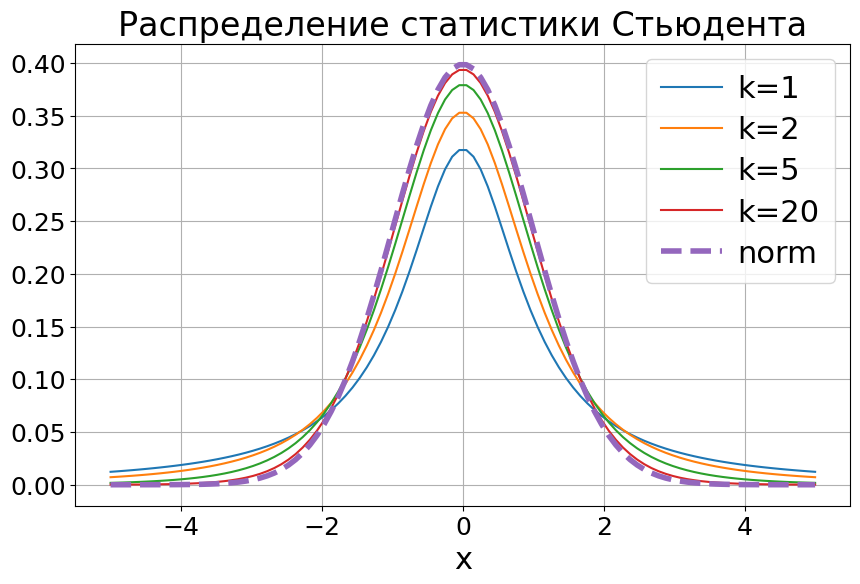

In [8]:
X = np.linspace(-5, 5, 100)
list_k = [1, 2, 5, 20]
for k in list_k:
    Y = stats.t.pdf(X, k)
    plt.plot(X, Y, label=f'k={k}')

Y = stats.norm.pdf(X, 0, 1)
plt.plot(X, Y, '--', label='norm', linewidth=4)

plt.legend()
plt.title('Распределение статистики Стьюдента')
plt.xlabel('x')
plt.grid()
plt.show()
#чем больше степений свободы, тем ближе к нормальному распределению

## Тест Стьюдента

Есть две выборки: $X_1,\ldots,X_{n_1}\sim N(\mu_1, \sigma_1)$ и $Y_1,\ldots,Y_{n_2}\sim N(\mu_2, \sigma_2)$.
    
Гипотезы: 
- $H_0$: матожидания 2-х выборок равны
- $H_1$: матожидания 2-х выборок не равны.

Статистика теста:
$$t(X^n, Y^n) = \dfrac{\overline{Y} - \overline{X}}{\sqrt{\dfrac{S^2_X}{n_1} + \dfrac{S^2_Y}{n_2}}} \approx St(\nu), \qquad \nu = \frac{\left(\dfrac{S^2_X}{n_1} + \dfrac{S^2_Y}{n_2}\right)^2}{\dfrac{S_X^4}{n_1^2 (n_1 - 1)} + \dfrac{S_Y^4}{n_2^2 (n_2 - 1)}}$$

Самостоятельно реализуем вычисление t-статистики: 

In [9]:
def get_student_parameter(data_one: np.array, data_two: np.array) -> float:
    """Вычисляет параметр функции распределения Стьюдента."""
    len_one, len_two = len(data_one), len(data_one)
    std_one, std_two = np.std(data_one), np.std(data_two)
    k = (
        ((std_one ** 2) / len_one + (std_two ** 2) / len_two) ** 2
        / (
            (std_one ** 4) / ((len_one ** 2) * (len_one - 1))
            + (std_two ** 4) / ((len_two ** 2) * (len_two - 1))
        )
    )
    return k


def get_ttest_statistic(data_one: np.array, data_two: np.array) -> float:
    """Считает статистику Стьюдента"""
    len_one, len_two = len(data_one), len(data_two)
    mean_one, mean_two = np.mean(data_one), np.mean(data_two)
    std_one, std_two = np.std(data_one, ddof=1), np.std(data_two, ddof=1)
    t = (mean_two - mean_one) / np.sqrt((std_two**2 / len_two) + (std_one**2 / len_one))
    return t

Сверим результаты с готовой реализацией теста

In [10]:
sample_size = 100
alpha = 0.05

np.random.seed(44)
data_control = np.random.normal(1, 1, sample_size)
data_pilot = np.random.normal(1.2, 1, sample_size)

k = get_student_parameter(data_control, data_pilot)
print(f'student_parameter = {k}')

critical_region_bounds = stats.t.ppf([alpha/2, 1 - alpha/2], df=k)
print(f'critical_region_bounds = {critical_region_bounds}')

ttest_statistic = get_ttest_statistic(data_control, data_pilot)
print(f'ttest_statistic = {ttest_statistic}')

pvalue = stats.t.cdf(-np.abs(ttest_statistic), df=k) * 2
print(f'pvalue = {pvalue}')

# сверим с готовой реализацией
ttest_statistic_real, pvalue_real = stats.ttest_ind(data_pilot, data_control)
print(f'stats.ttest_ind = {stats.ttest_ind(data_pilot, data_control)}')
assert np.isclose(ttest_statistic_real, ttest_statistic, 1e-9), 'Статистика посчитана неверно'

student_parameter = 196.53643393447297
critical_region_bounds = [-1.97210778  1.97210778]
ttest_statistic = 1.8203056424009751
pvalue = 0.0702335577441075
stats.ttest_ind = Ttest_indResult(statistic=1.8203056424009751, pvalue=0.07022230781028711)


Построим критические области критерия

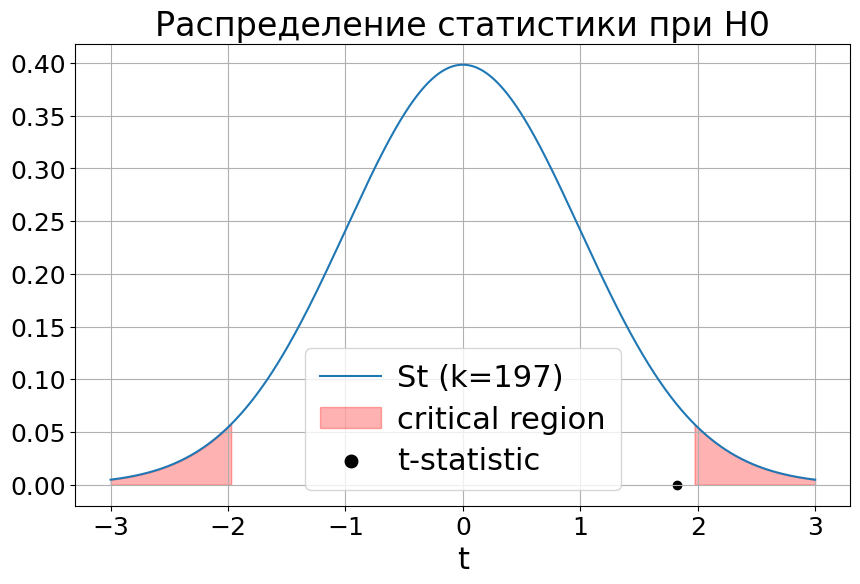

In [11]:
X = np.linspace(-3, 3, 1000)
Y = stats.t.pdf(X, k)

plt.plot(X, Y, label=f'St (k={k:0.0f})')

critical_mask_list = [X < critical_region_bounds[0], X > critical_region_bounds[1]]
for idx, mask in enumerate(critical_mask_list):
    X_ = X[mask]
    Y_upper = Y[mask]
    Y_down = np.zeros(len(Y_upper))
    plt.fill_between(
        X_, Y_down, Y_upper,
        color='r', alpha=0.3,
        label='critical region' if idx==0 else ''
    )

plt.scatter([ttest_statistic], [0], color='k', label='t-statistic')

plt.title('Распределение статистики при H0')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

# 3. Двусторонний и односторонние критерии

Критическая область зависит от альтернативы

#### Двусторонний критерий

- $H_1$: $\theta \ne \theta_0$

#### Правосторонняя гипотеза

- $H_1$: $\theta > \theta_0$

#### Левосторонняя гипотеза

- $H_1$: $\theta < \theta_0$

Для гипотезы о равенстве средних $\theta = t$ и $\theta_0 = 0$.



Построим критическую область одностороннего критерия.

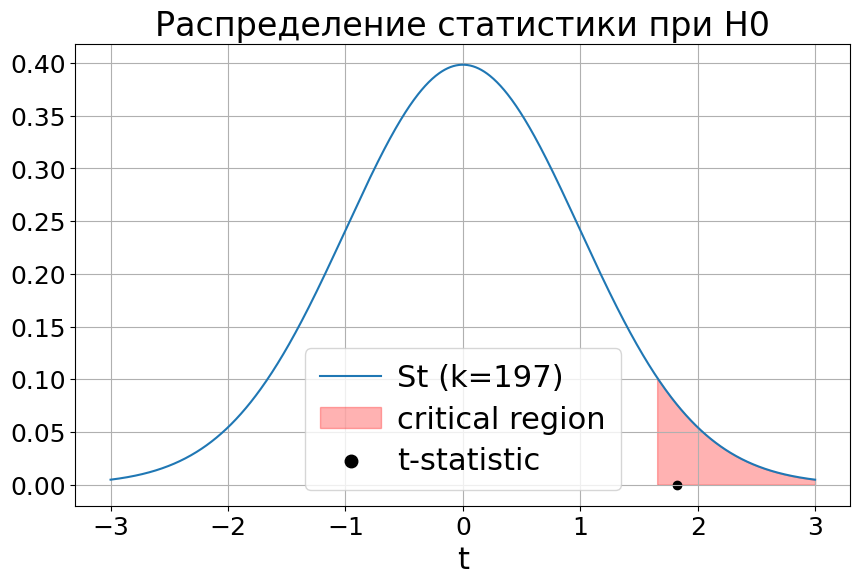

In [12]:
sample_size = 100
alpha = 0.05

k = get_student_parameter(data_control, data_pilot)
critical_region_bound = stats.t.ppf([1 - alpha], df=k)


X = np.linspace(-3, 3, 1000)
Y = stats.t.pdf(X, k)

plt.plot(X, Y, label=f'St (k={k:0.0f})')

mask = X > critical_region_bound
X_ = X[mask]
Y_upper = Y[mask]
Y_down = np.zeros(len(Y_upper))
plt.fill_between(
    X_, Y_down, Y_upper,
    color='r', alpha=0.3,
    label='critical region'
)

plt.scatter([ttest_statistic], [0], color='k', label='t-statistic')

plt.title('Распределение статистики при H0')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

Односторонние критерии обычно применяют в случаях, когда нас не интересует отклонение в одну из сторон.

# 4. p-value

p-value – вероятность наблюдать полученное или более экстремальное значение статистики при условии, что нулевая гипотеза верна. 

$$
p{-}value = \mathbb{P}(T > t | H_0)
$$

Статистический критерий можно записать как

$$
p{-}value < \alpha \iff отвергнуть~гипотезу
$$

In [9]:
x = np.random.normal(0, 1, 100)
y = np.random.normal(0.4, 1, 100)
stats.ttest_ind(x, y)

Ttest_indResult(statistic=-5.100310939750893, pvalue=7.909852153789627e-07)

# 5. Данные пиццерии

Посчитаем p-value для эксперимента с изменением дизайна сайта.

In [10]:
import os
from datetime import datetime, timedelta
import pandas as pd

URL_BASE = 'https://raw.githubusercontent.com/ab-courses/simulator-ab-datasets/main/2022-04-01/'

def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

In [11]:
df_sales = read_database('2022-04-01T12_df_sales.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_users = read_database('experiment_users.csv')

df_sales - информация о покупках, одна строка - один заказ. Атрибуты:
- sale_id - идентификатор покупки;
- date - дата покупки;
- count_pizza - количество пицц в заказе;
- count_drink - количество напитков в заказе;
- price - стоимость заказа;
- user_id - идентификатор пользователя;

df_users - список пользователей эксперимента с разбивкой на группы:
- user_id - идентификатор пользователя;
- pilot - номер группы  пользователя;

In [12]:
df_users.head()

,user_id,pilot
0,0ffc65,0
1,b962b9,0
2,7ea63f,0
3,7f9a61,0
4,459e55,0


In [13]:
# количество пользователей в группах
df_users['pilot'].value_counts()

0    11769
1    11564
Name: pilot, dtype: int64

In [14]:
# считаем значения метрики
begin_date = datetime(2022, 3, 23)
end_date = datetime(2022, 3, 30)
df_metrics = (
    df_sales
    [(df_sales['date'] >= begin_date) & (df_sales['date'] < end_date)]
    .groupby('user_id')[['price']].sum()
    .reset_index()  
)

In [15]:
df_metrics.head()

,user_id,price
0,0000d4,720
1,0000de,660
2,0000e4,840
3,0001e2,2430
4,0001ff,720


In [16]:
df = pd.merge(df_users, df_metrics, on='user_id', how='left').fillna(0)

In [17]:
df.head()

,user_id,pilot,price
0,0ffc65,0,0.0
1,b962b9,0,840.0
2,7ea63f,0,0.0
3,7f9a61,0,0.0
4,459e55,0,0.0


In [18]:
data_control = df[df['pilot'] == 0]['price']
data_pilot = df[df['pilot'] == 1]['price']
stats.ttest_ind(data_control, data_pilot)

Ttest_indResult(statistic=-7.800743549967138, pvalue=6.411291718224787e-15)

Получили близкое к нулю p-value, как и на платформе.

**Вывод:** 
- На уровне значимости 0.05 гипотеза о равенстве средних отклоняется
- Изменение статистически значимо

### Задача 1. Отличия до эксперимента
Возьмите те же группы, что и в эксперименте с изменением дизайна сайта, и проверьте значимость отличий средней выручки с пользователя на неделе перед экспериментом (c 2022.03.16 по 2022.03.23).

Для решения используйте данные из файлов `2022-04-01T12_df_sales.csv` и `experiment_users.csv`.

В качестве ответа введите p-value, округлённое до 3-го знака после точки.

In [13]:
import os
from datetime import datetime
import pandas as pd
from scipy import stats

In [14]:
URL_BASE = 'https://raw.githubusercontent.com/ab-courses/simulator-ab-datasets/main/2022-04-01/'

def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

In [26]:
df_sales = read_database('2022-04-01T12_df_sales.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.head()

,sale_id,date,count_pizza,count_drink,price,user_id
0,1000001,2022-02-04 10:00:24,1,0,720,1c1543
1,1000002,2022-02-04 10:02:28,1,1,930,a9a6e8
2,1000003,2022-02-04 10:02:35,3,1,1980,23420a
3,1000004,2022-02-04 10:03:06,1,1,750,3e8ed5
4,1000005,2022-02-04 10:03:23,1,1,870,cbc468


df_sales - информация о покупках, одна строка - один заказ. Атрибуты:
- sale_id - идентификатор покупки;
- date - дата покупки;
- count_pizza - количество пицц в заказе;
- count_drink - количество напитков в заказе;
- price - стоимость заказа;
- user_id - идентификатор пользователя;

In [24]:
df_users = read_database('experiment_users.csv')
df_users.head()

,user_id,pilot
0,0ffc65,0
1,b962b9,0
2,7ea63f,0
3,7f9a61,0
4,459e55,0


df_users - список пользователей эксперимента с разбивкой на группы:
- user_id - идентификатор пользователя;
- pilot - номер группы  пользователя;

In [28]:
# считаем среднюю выручку с пользователя на неделе
begin_date = datetime(2022, 3, 16)
end_date = datetime(2022, 3, 23)
df_metrics = (
    df_sales
    [(df_sales['date'] >= begin_date) & (df_sales['date'] < end_date)]
    .groupby('user_id')[['price']].sum()
    .reset_index()  
)
df_metrics.head()

,user_id,price
0,000096,720
1,00092c,780
2,000bb2,720
3,000ea9,1560
4,000ec6,690


In [29]:
# соединяем 2 датафрейма - данные по покупкам и данные по эксперименту
df = pd.merge(df_users, df_metrics, on='user_id', how='left').fillna(0)
df.head()

,user_id,pilot,price
0,0ffc65,0,0.0
1,b962b9,0,0.0
2,7ea63f,0,0.0
3,7f9a61,0,0.0
4,459e55,0,2160.0


In [30]:
# фильтруем пользователей по группа и проводим t-тест
data_control = df[df['pilot'] == 0]['price']
data_pilot = df[df['pilot'] == 1]['price']
pvalue = stats.ttest_ind(data_control, data_pilot).pvalue
print(f'pvalue = {pvalue:0.3f}')

pvalue = 0.199


### Задача 2. Среднее время между покупками
При выполнении прошлого задания вы могли заметить, что в данных много нулей. Это значит, что большая часть пользователей, совершивших покупку во время эксперимента, не совершала покупок на неделе до эксперимента. Интересно, как часто наши клиенты делают покупки?

Оцените среднее время между покупками. Возьмите всех клиентов, у которых 2 и более покупок. \
Вычислите время между покупками (для клиента с N покупками должно получиться N-1 значения времени). \
Объедините значения всех клиентов и вычислите среднее.

Для решения используйте данные из файлов `2022-04-01T12_df_sales.csv`.

В качестве ответа введите среднее количество дней между покупками, округлённое до целого значения.

In [31]:
URL_BASE = 'https://raw.githubusercontent.com/ab-courses/simulator-ab-datasets/main/2022-04-01/'

def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

In [32]:
df_sales = read_database('2022-04-01T12_df_sales.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.head()

,sale_id,date,count_pizza,count_drink,price,user_id
0,1000001,2022-02-04 10:00:24,1,0,720,1c1543
1,1000002,2022-02-04 10:02:28,1,1,930,a9a6e8
2,1000003,2022-02-04 10:02:35,3,1,1980,23420a
3,1000004,2022-02-04 10:03:06,1,1,750,3e8ed5
4,1000005,2022-02-04 10:03:23,1,1,870,cbc468


In [45]:
# для каждого пользователя считаем количество покупок, дату первой и последней покупки
df = df_sales.groupby('user_id')[['date']].agg(['count', 'min', 'max']) 
df.columns = [x[1] for x in df.columns] 
df = df.reset_index() 
df.head()  

,user_id,count,min,max
0,000096,2,2022-03-04 11:15:55,2022-03-22 13:16:09
1,0000d4,2,2022-02-28 16:32:09,2022-03-27 11:26:30
2,0000de,3,2022-02-11 18:57:15,2022-03-25 17:01:47
3,0000e4,2,2022-02-28 12:41:47,2022-03-27 14:54:35
4,000112,1,2022-02-06 14:38:30,2022-02-06 14:38:30


In [50]:
# оставляем пользователей с 2 и более покупок
df = df[df['count'] >= 2]
df['count'].unique()

array([2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
# количество секунд между первой и последней покупкой
df['delta'] = (df['max'] - df['min']).dt.total_seconds()
df.head()

,user_id,count,min,max,delta
0,000096,2,2022-03-04 11:15:55,2022-03-22 13:16:09,1562414.0
1,0000d4,2,2022-02-28 16:32:09,2022-03-27 11:26:30,2314461.0
2,0000de,3,2022-02-11 18:57:15,2022-03-25 17:01:47,3621872.0
3,0000e4,2,2022-02-28 12:41:47,2022-03-27 14:54:35,2340768.0
6,0001e2,2,2022-03-25 11:01:07,2022-03-27 16:54:00,193973.0


In [54]:
# суммарное время между покупками
sum_delta = df['delta'].sum()
sum_delta

155716119115.0

In [55]:
# суммарное количество периодов между покупками
count_periods = df['count'].sum() - len(df)
count_periods

104069

In [56]:
# среднее = суммарное время / количество периодов
answer = sum_delta / count_periods / 3600 / 24
print('answer:', int(round(answer)))

answer: 17
